In [1]:
# import libraries
library(ggplot2)
library(tidyverse)
library(viridis)
library(viridisLite)
library(readxl)
library(ggpubr)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite



In [15]:
# import dataset as gene_expression
gene_expression <- read_excel("data.xlsx", sheet = "gene")
head(gene_expression)  # note the value was <chr> need to change as <dbl>

animal,groups,treatment,items,index,concentrate
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A05,A,control,1,C1q,0.005065780
A05,A,Normal,1,C1q,0.005065780
A05,A,control,0,C1q,0.005101015
A05,A,Normal,0,C1q,0.005101015
A01,A,control,1,C1q,0.005391865
A01,A,Normal,1,C1q,0.005391865


In [5]:
# change the format of values from <chr> to <dbl> with `as.numeric`
# gene_expression$value <- as.numeric(gene_expression$value)
# check the first lines of the dataset
head(gene_expression)

animal,groups,treatment,items,index,concentrate
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A01,A,control,0,C1q,0.006777646
A01,A,control,1,C1q,0.005391865
A05,A,control,0,C1q,0.005101015
A05,A,control,1,C1q,0.005065780
A06,A,control,0,C1q,0.006638164
A06,A,control,1,C1q,0.008578850


In [16]:
gene_expression$treatment <- factor(gene_expression$treatment, levels=c("control", "UGAM", "Normal", "Disease"))

In [17]:
my_comparisons <- list( c("control", "UGAM"),c("Normal","Disease"))

Warning message:
“Removed 52 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 52 rows containing non-finite values (stat_signif).”
Warning message in wilcox.test.default(c(0.00506577951035552, 0.00510101479331609, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.00506577951035552, 0.00510101479331609, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0233570195099209, 0.0276802349719488, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(NA, NA, 0.0233570195099209, 0.0236011341494191, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0172770414581292, 0.0176400688250958, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0172770414581292, 0.0176400688250958, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(2.5227548176625, 2.5227548176625, 4.51585761

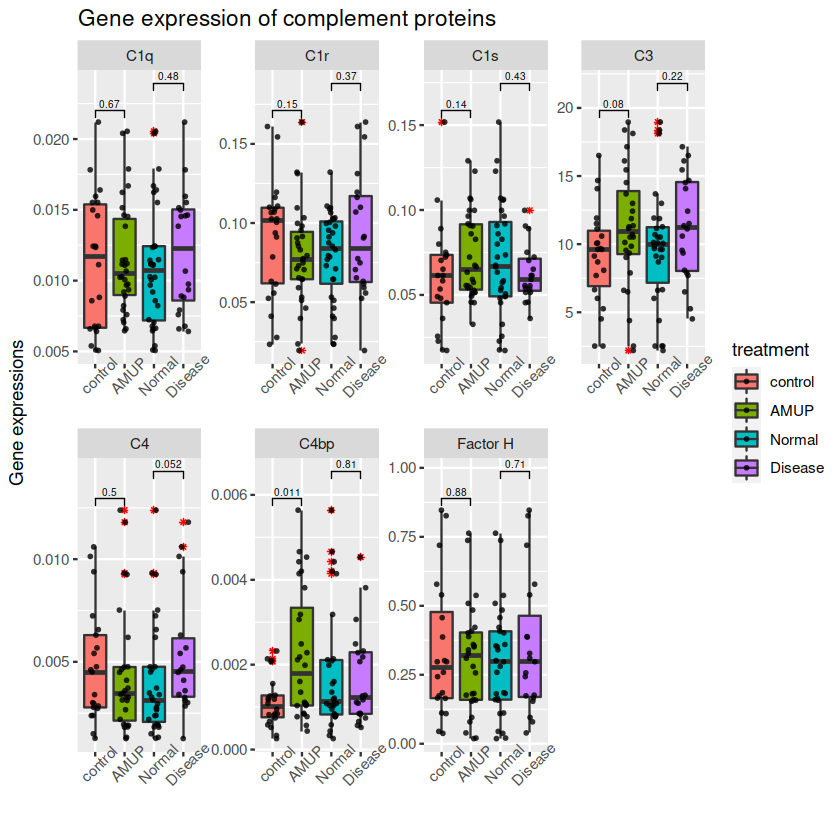

In [18]:
# for illustration a figure
p_gene_expression <- ggplot(gene_expression, aes(x=treatment, y=concentrate, fill=treatment)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size =1) +
    geom_jitter(shape=16, size=1.0, alpha = 0.8, position = position_jitter(0.18)) +
    stat_compare_means(comparisons = my_comparisons, size=2, exact = FALSE) + # add pairwise comparison
#     stat_compare_means()  + # add global p-value +
    labs(title = "Gene expression of complement proteins",
#         subtitle = "(limited to characters with more than 100 appearances)",
        y = "Gene expressions ", x = "")+ 
    theme(axis.text.x = element_text(angle=45))+
    facet_wrap(~index, scales="free", nrow=2)
p_gene_expression

In [19]:
svg("gene_expression.svg")
p_gene_expression
dev.off()

Warning message:
“Removed 52 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 52 rows containing non-finite values (stat_signif).”
Warning message in wilcox.test.default(c(0.00506577951035552, 0.00510101479331609, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.00506577951035552, 0.00510101479331609, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0233570195099209, 0.0276802349719488, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(NA, NA, 0.0233570195099209, 0.0236011341494191, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0172770414581292, 0.0176400688250958, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.0172770414581292, 0.0176400688250958, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(2.5227548176625, 2.5227548176625, 4.51585761

png 
  2